## PRCP-1016-HeartDieseasePred
#### 
Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

Task3:-Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.


#### Dataset Link:
●	Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
●	People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
Domain: Healthcare
Link :  https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1016-HeartDieseasePred

#### Dataset
1.	There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
2.	·              slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
3.	·              thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
4.	·              resting_blood_pressure (type: int): resting blood pressure
5.	·              chest_pain_type (type: int): chest pain type (4 values)
6.	·              num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
7.	·              fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
8.	·              resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
9.	·              serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
10.	·              oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
11.	·              sex (type: binary): 0: female, 1: male
12.	·              age (type: int): age in years
13.	·              max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
14.	·              exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)
.zip


In [1]:
#Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the heart dataset
heartdata=pd.read_csv("values.csv")
heartdata

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [3]:
# Among all the features 'thal' is the one which has categorical values,

In [4]:
heartdata["thal"].value_counts() # The total unique values in 'thal'

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [5]:
#load the target dataset
resultdata=pd.read_csv("labels.csv")
resultdata

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [6]:
#merge the target column with independent values
heartdataset=pd.merge(heartdata,resultdata,on='patient_id') # By merging we created a single dataset
heartdataset

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [7]:
heartdataset["heart_disease_present"].value_counts()  #To check the balancing of the dataset

heart_disease_present
0    100
1     80
Name: count, dtype: int64

### Observations:
1. Patient_id is unique id / primary id column. Hence we can remove it
2. In above dataset, feature 'thal' has categorical value. We need to encode it

In [8]:
#Basic checks - it is done to get more information about the nature of the dataset
heartdataset.head(10) 

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


In [9]:
heartdataset.tail(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
170,qhz9ye,1,reversible_defect,150,4,0,0,2,270,0.8,1,58,111,1,1
171,u25507,1,normal,112,4,1,0,2,212,0.1,1,66,132,1,1
172,j9tw19,2,reversible_defect,118,4,0,0,0,219,1.2,1,39,140,0,1
173,5o32oi,1,reversible_defect,140,4,0,0,0,299,1.6,1,51,173,1,1
174,o63ri2,1,normal,140,4,0,0,0,239,1.2,1,54,160,0,0
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [10]:
heartdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [11]:
heartdataset.describe() 

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [12]:
heartdataset.isnull().sum() #To find the null values in the dataset

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [13]:
heartdataset.duplicated().sum() #Duplicate check

0

### Observations
1. Based on above observation, among 14 independent columns, we have 2 object columns, 11 integer columns, 1 float column and 1 dependent column
2. In total, we have 180 unique row data. There is no null data available in the dataset

# EDA

#### Univariant Analysis

In [14]:
#Lets check column names:
intcolumns=[]
for col_name in heartdataset.columns:
    if heartdataset[col_name].dtypes != "object":
        intcolumns.append(col_name)
    else:
        pass 
intcolumns

['slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'heart_disease_present']

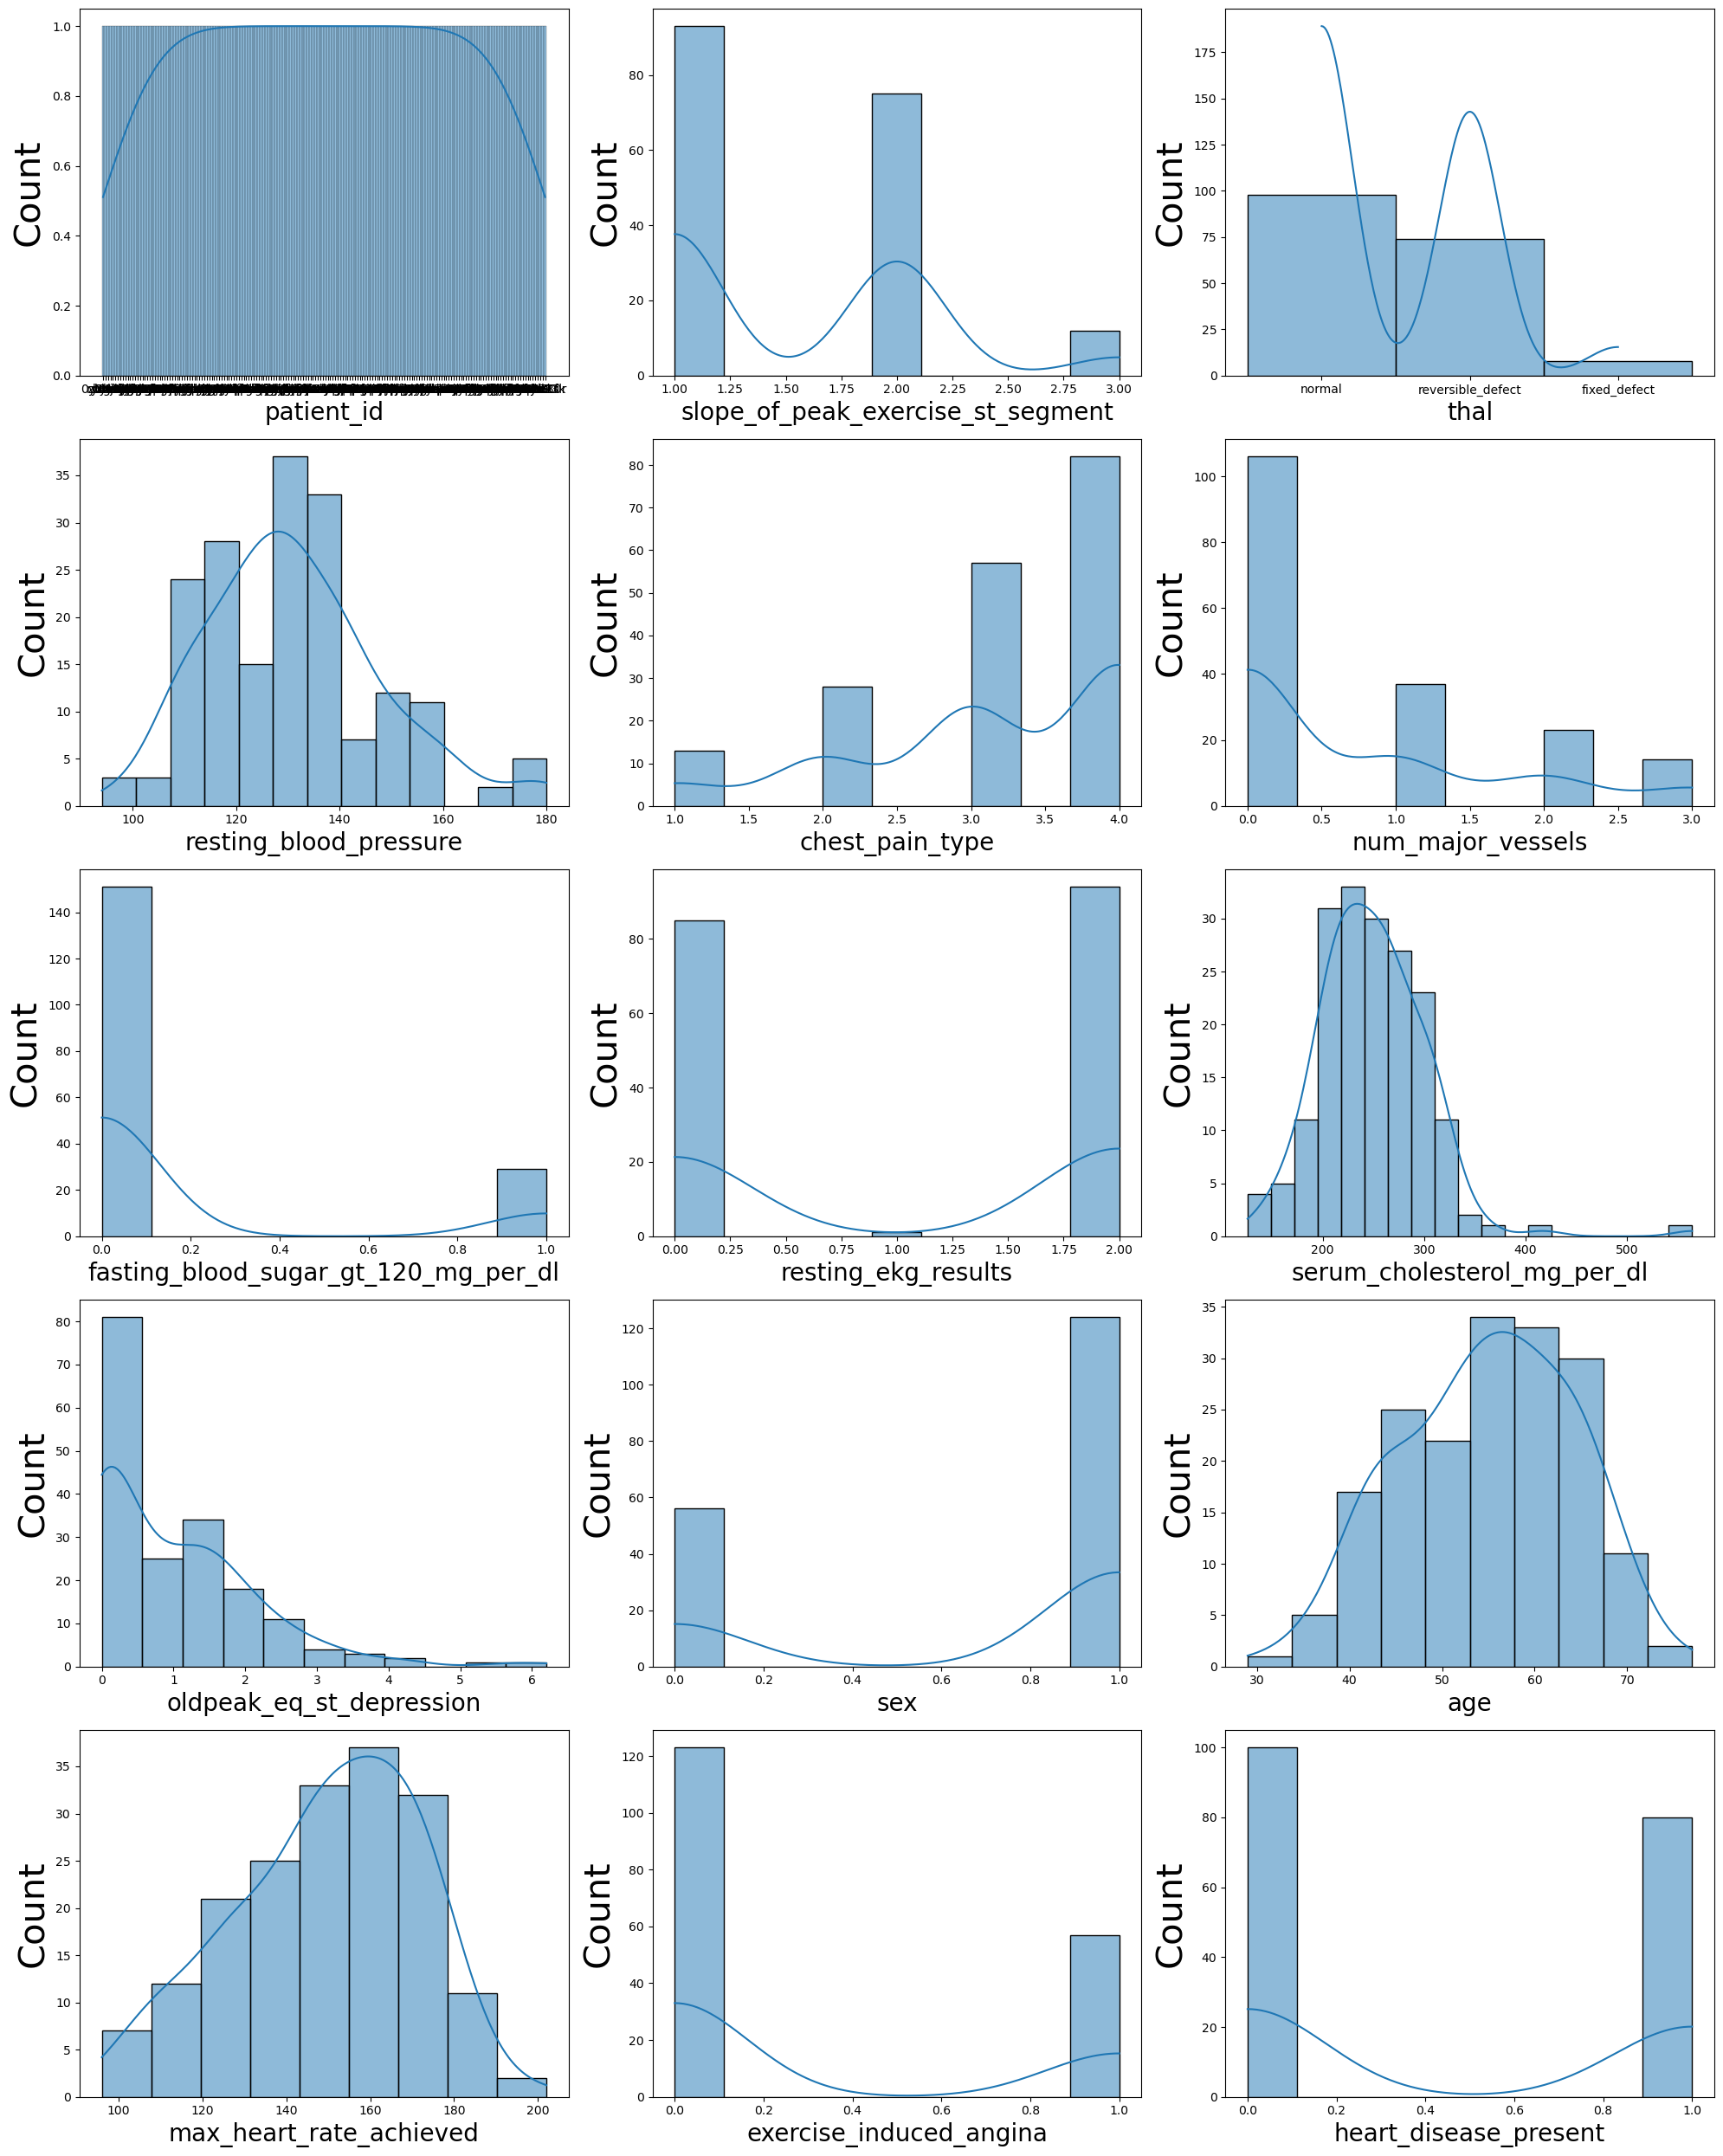

In [15]:
#Column vs Count of heart dataset
plt.figure(figsize=(20,25),facecolor='white') 
plotnumber=1

for column in heartdataset.columns: 
    if plotnumber<=15:
        plt.subplot(5,3,plotnumber) 
        sns.histplot(heartdataset[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=30)
    plotnumber+=1
plt.tight_layout()

### Observations:
1. Columns:serum_cholesterol_mg_per_dl,resting_blood_pressure,oldpeak_eq_st_depression
2. these above columns have skewness with respect to histplot 

Note: During feature engineering we will handle the skewness

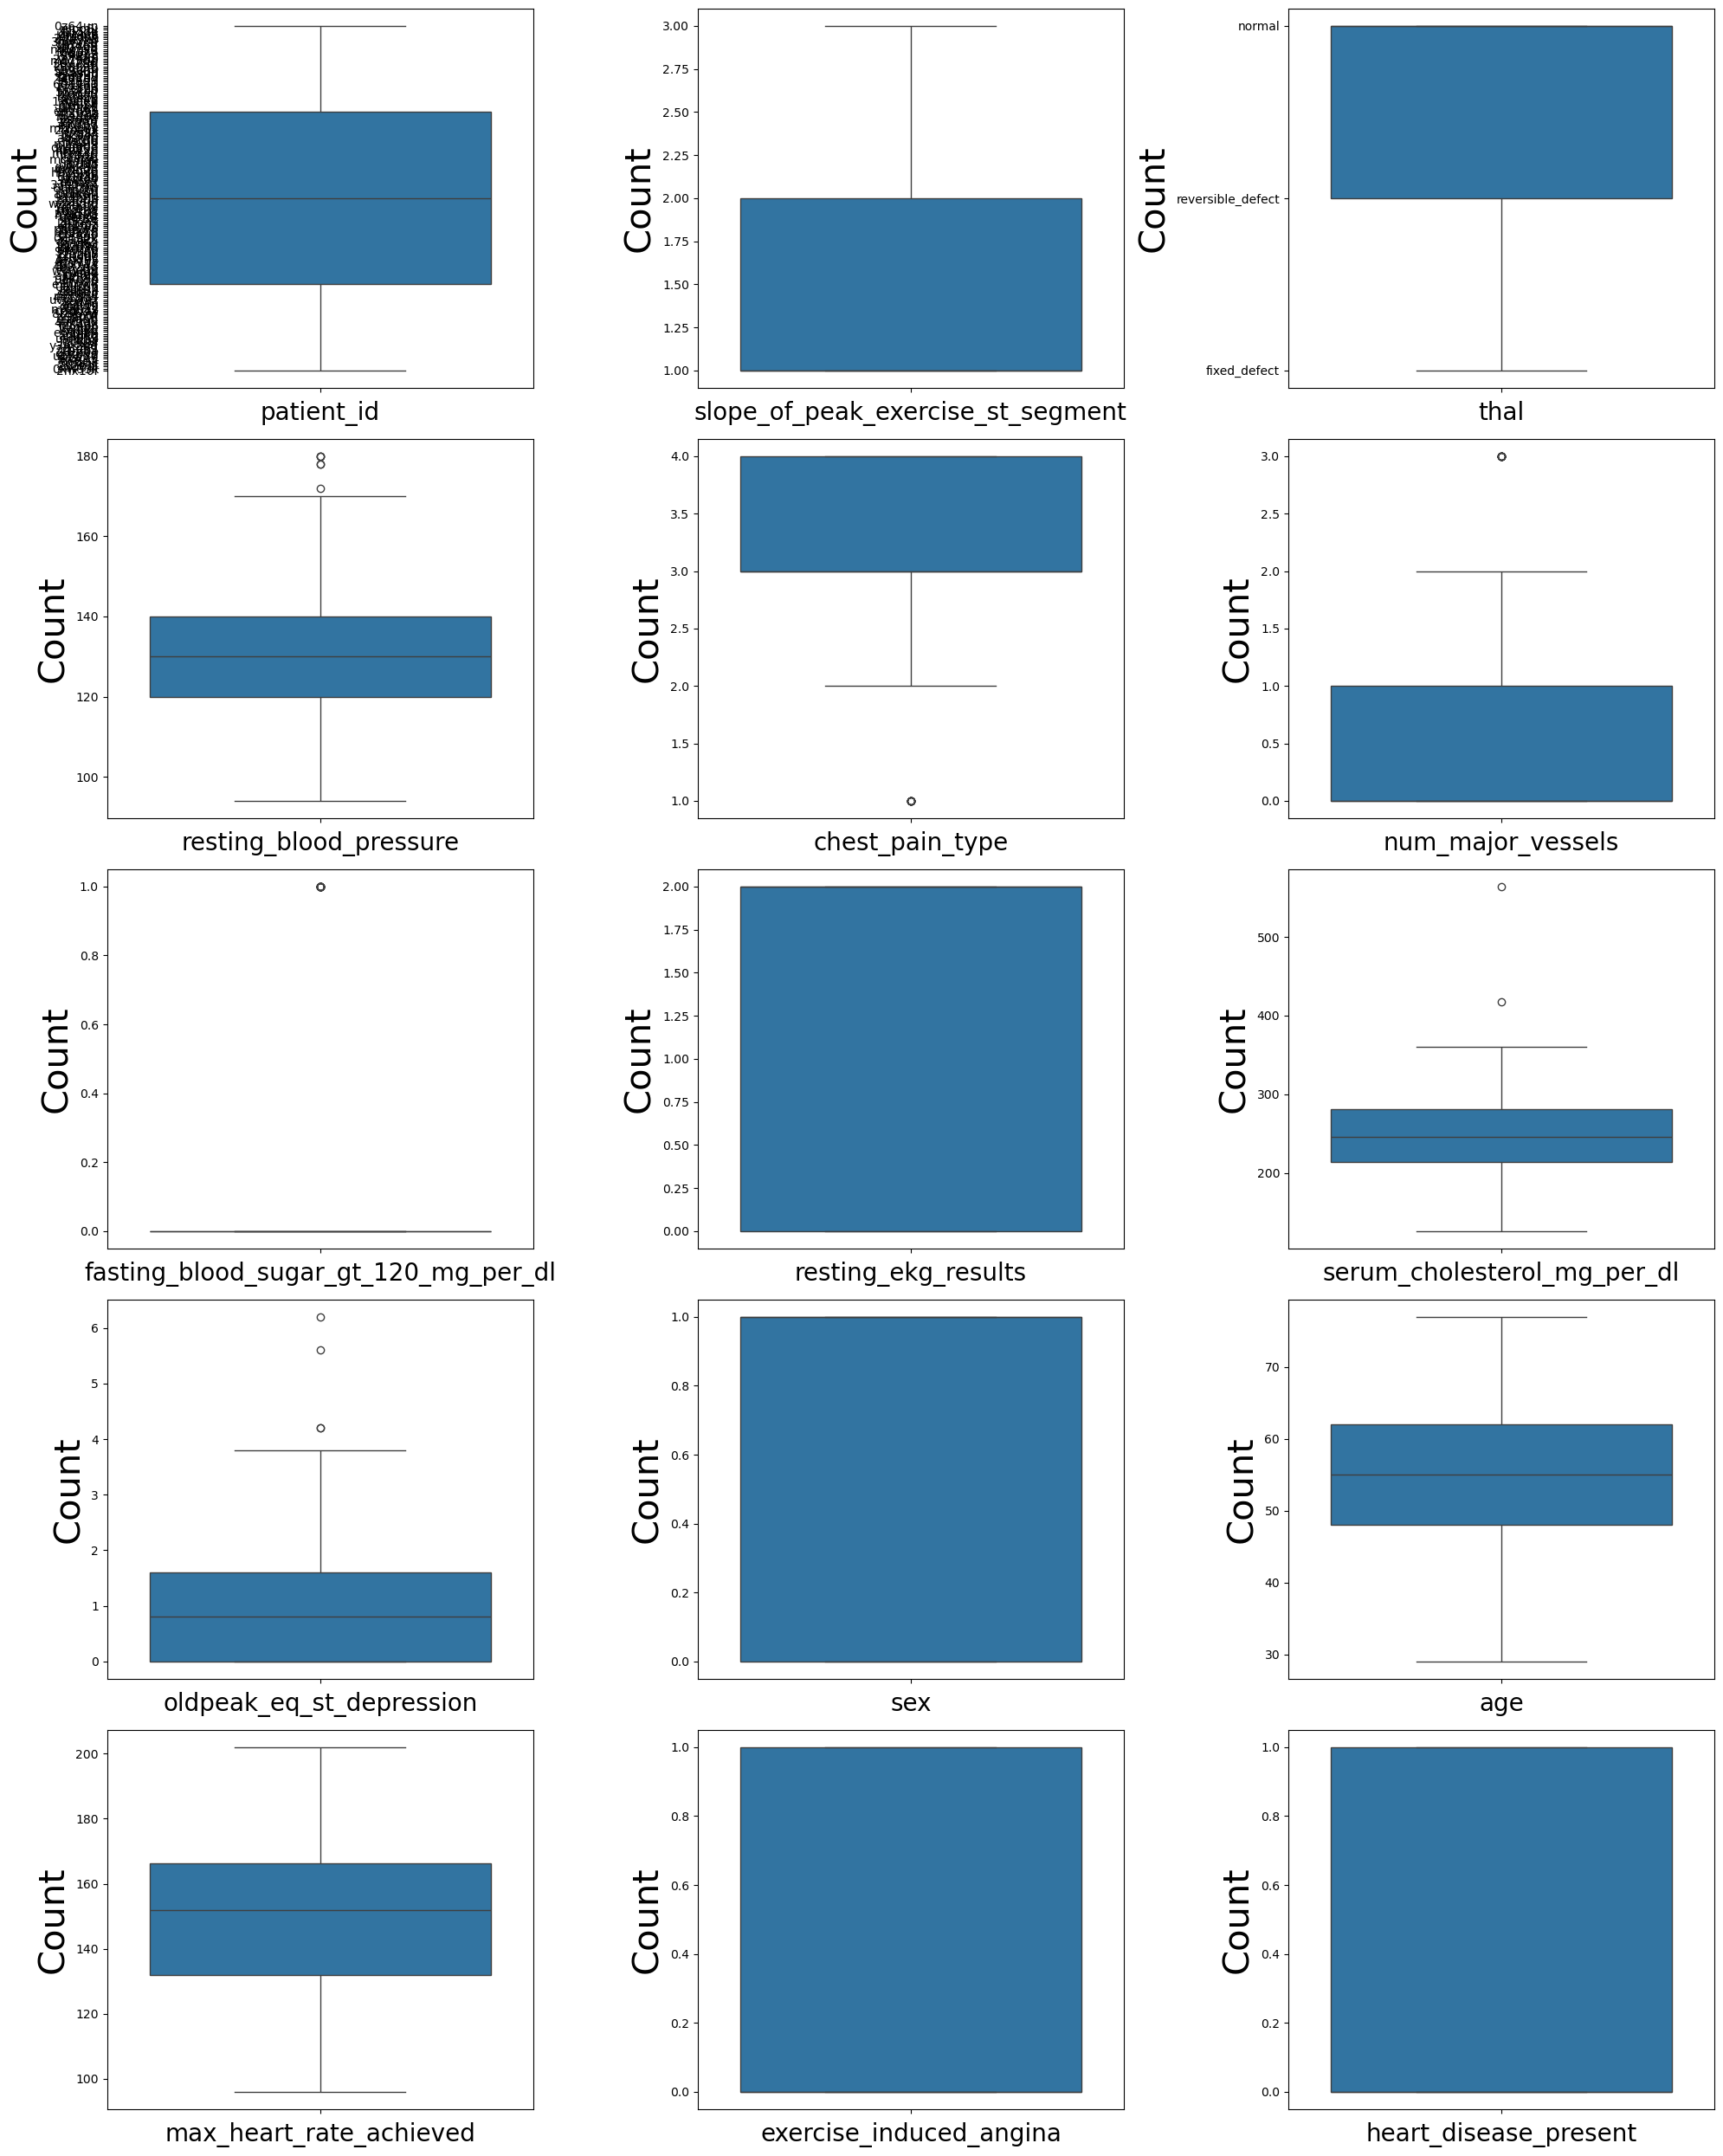

In [16]:
#outliers check
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in heartdataset.columns:
    if plotnumber<=15:
        plt.subplot(5,3,plotnumber)
        sns.boxplot(heartdataset[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=30)
    plotnumber+=1
plt.tight_layout()

#### With above inference, 
 Most of the columns contain categorical values. Outliers are less and present in only few columns. Hence no need to handle outliers.

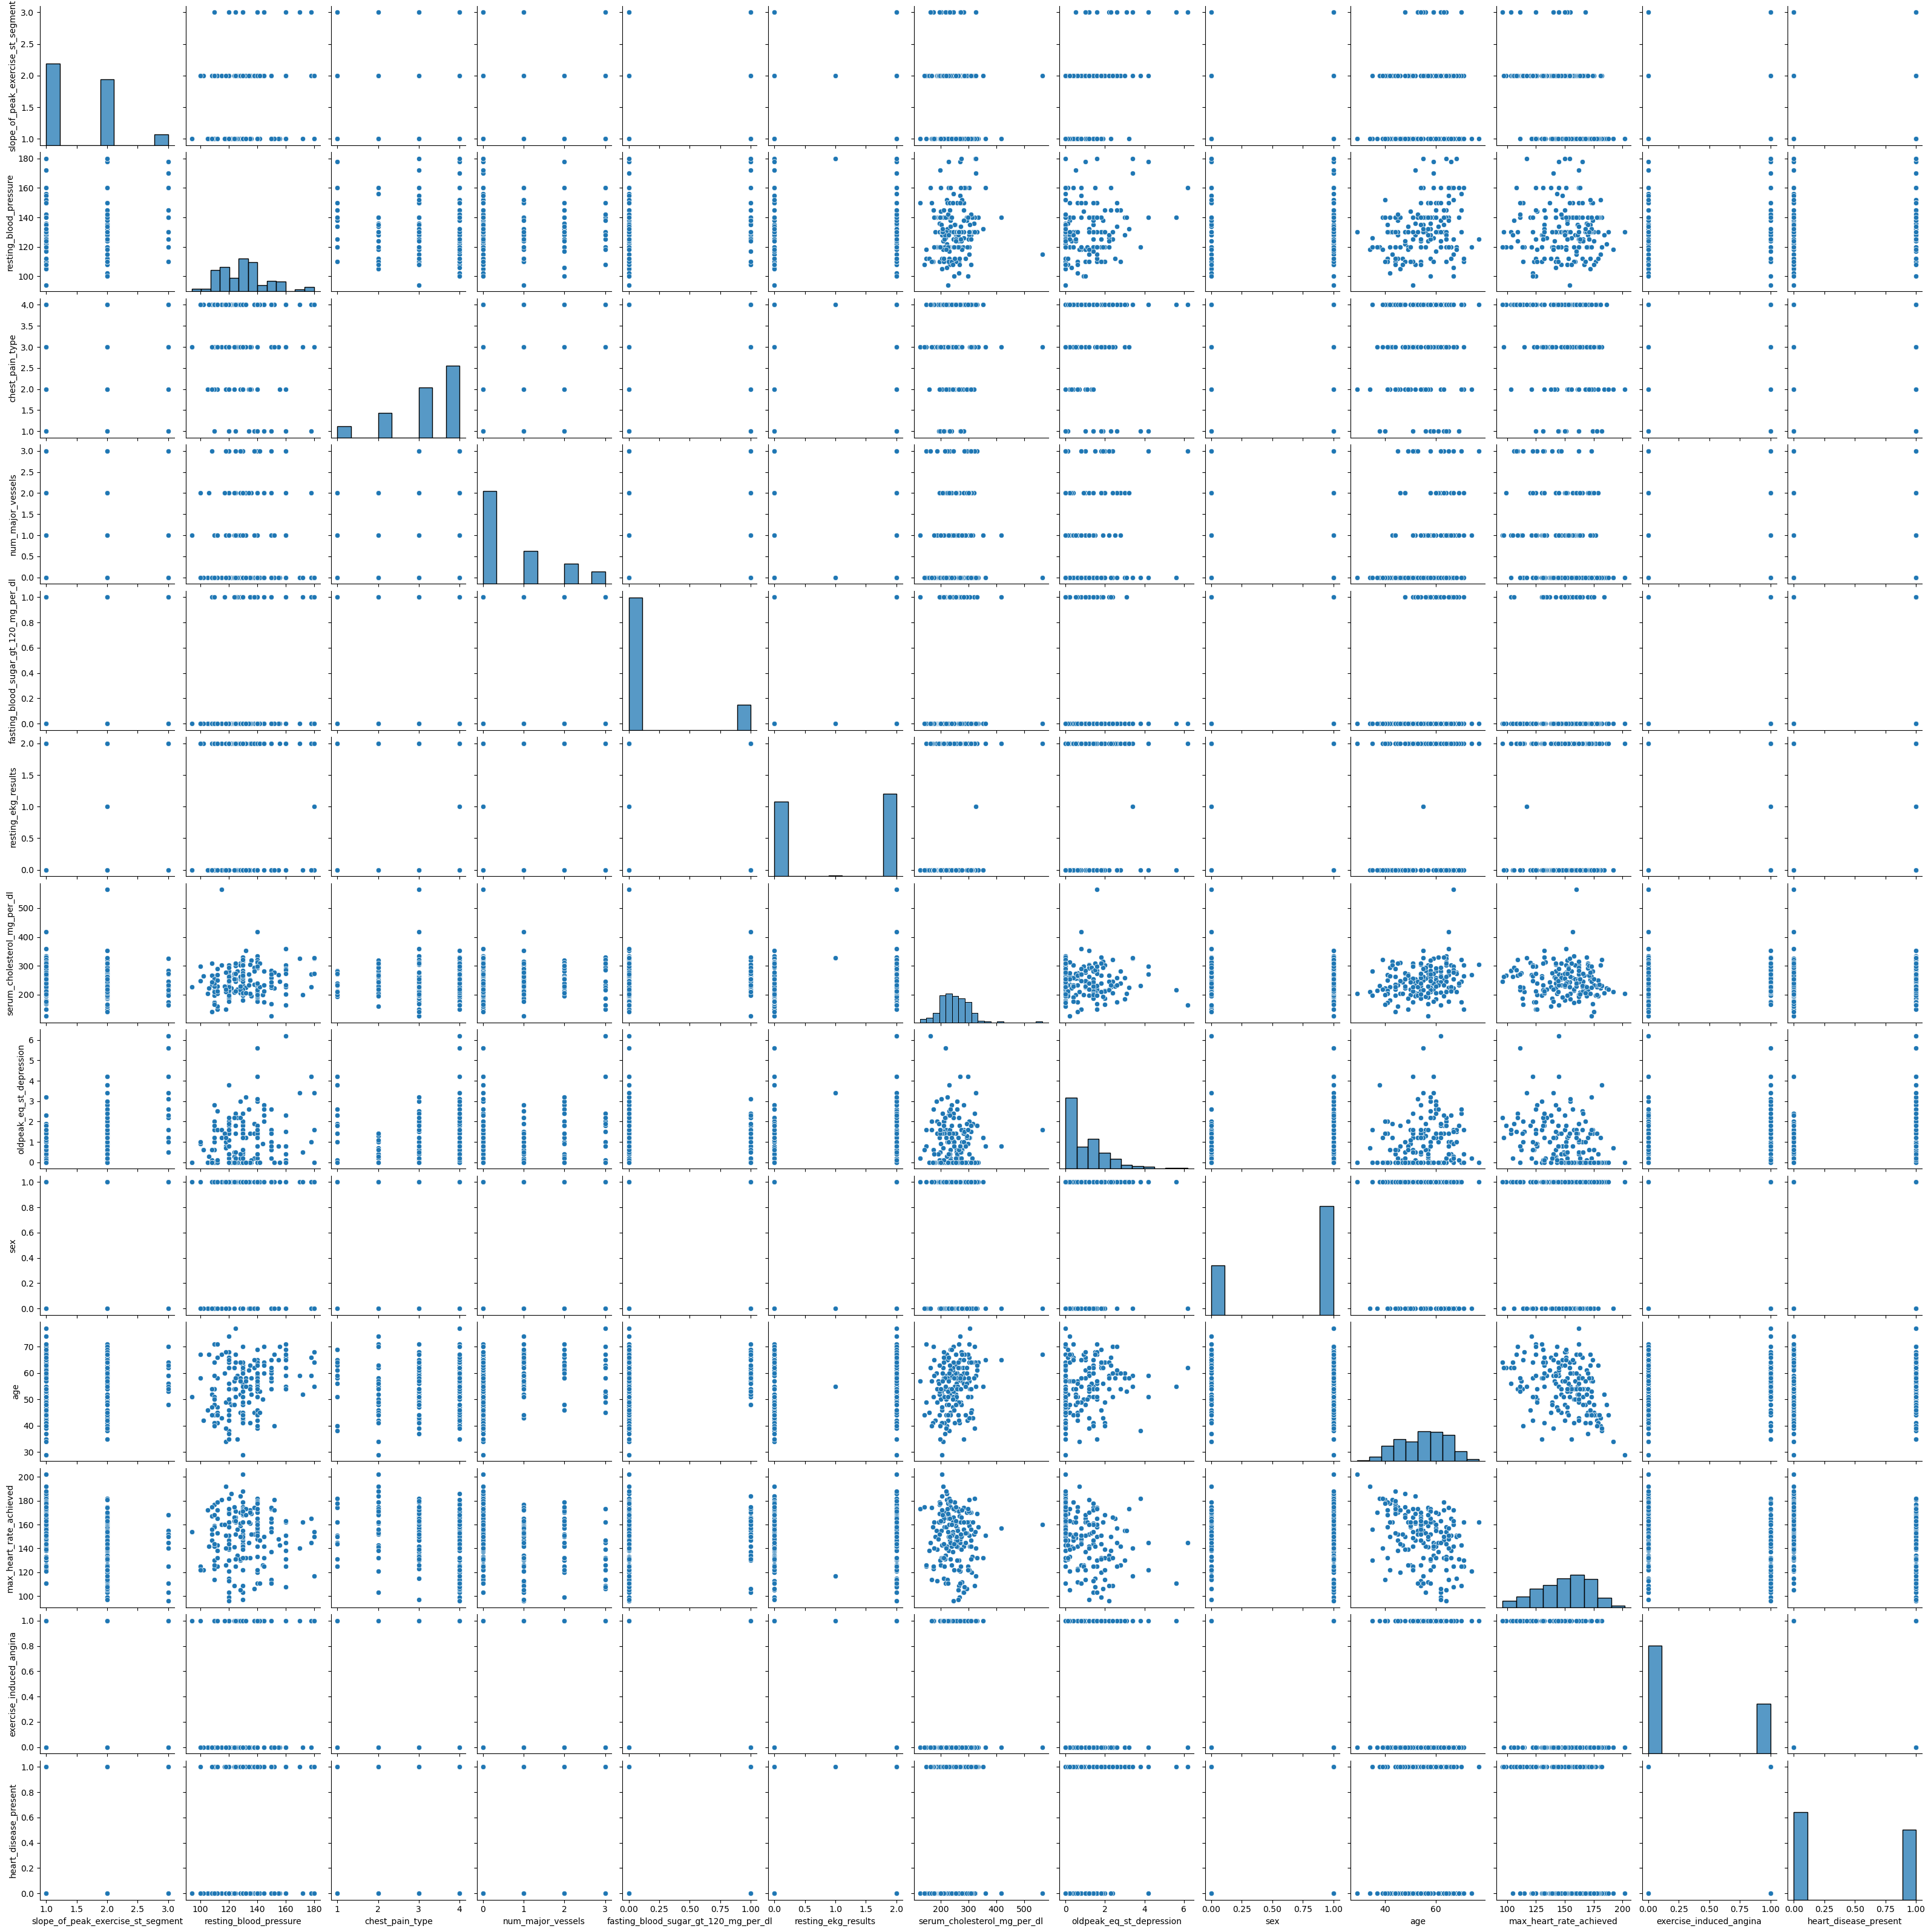

In [17]:
sns.pairplot(heartdataset)

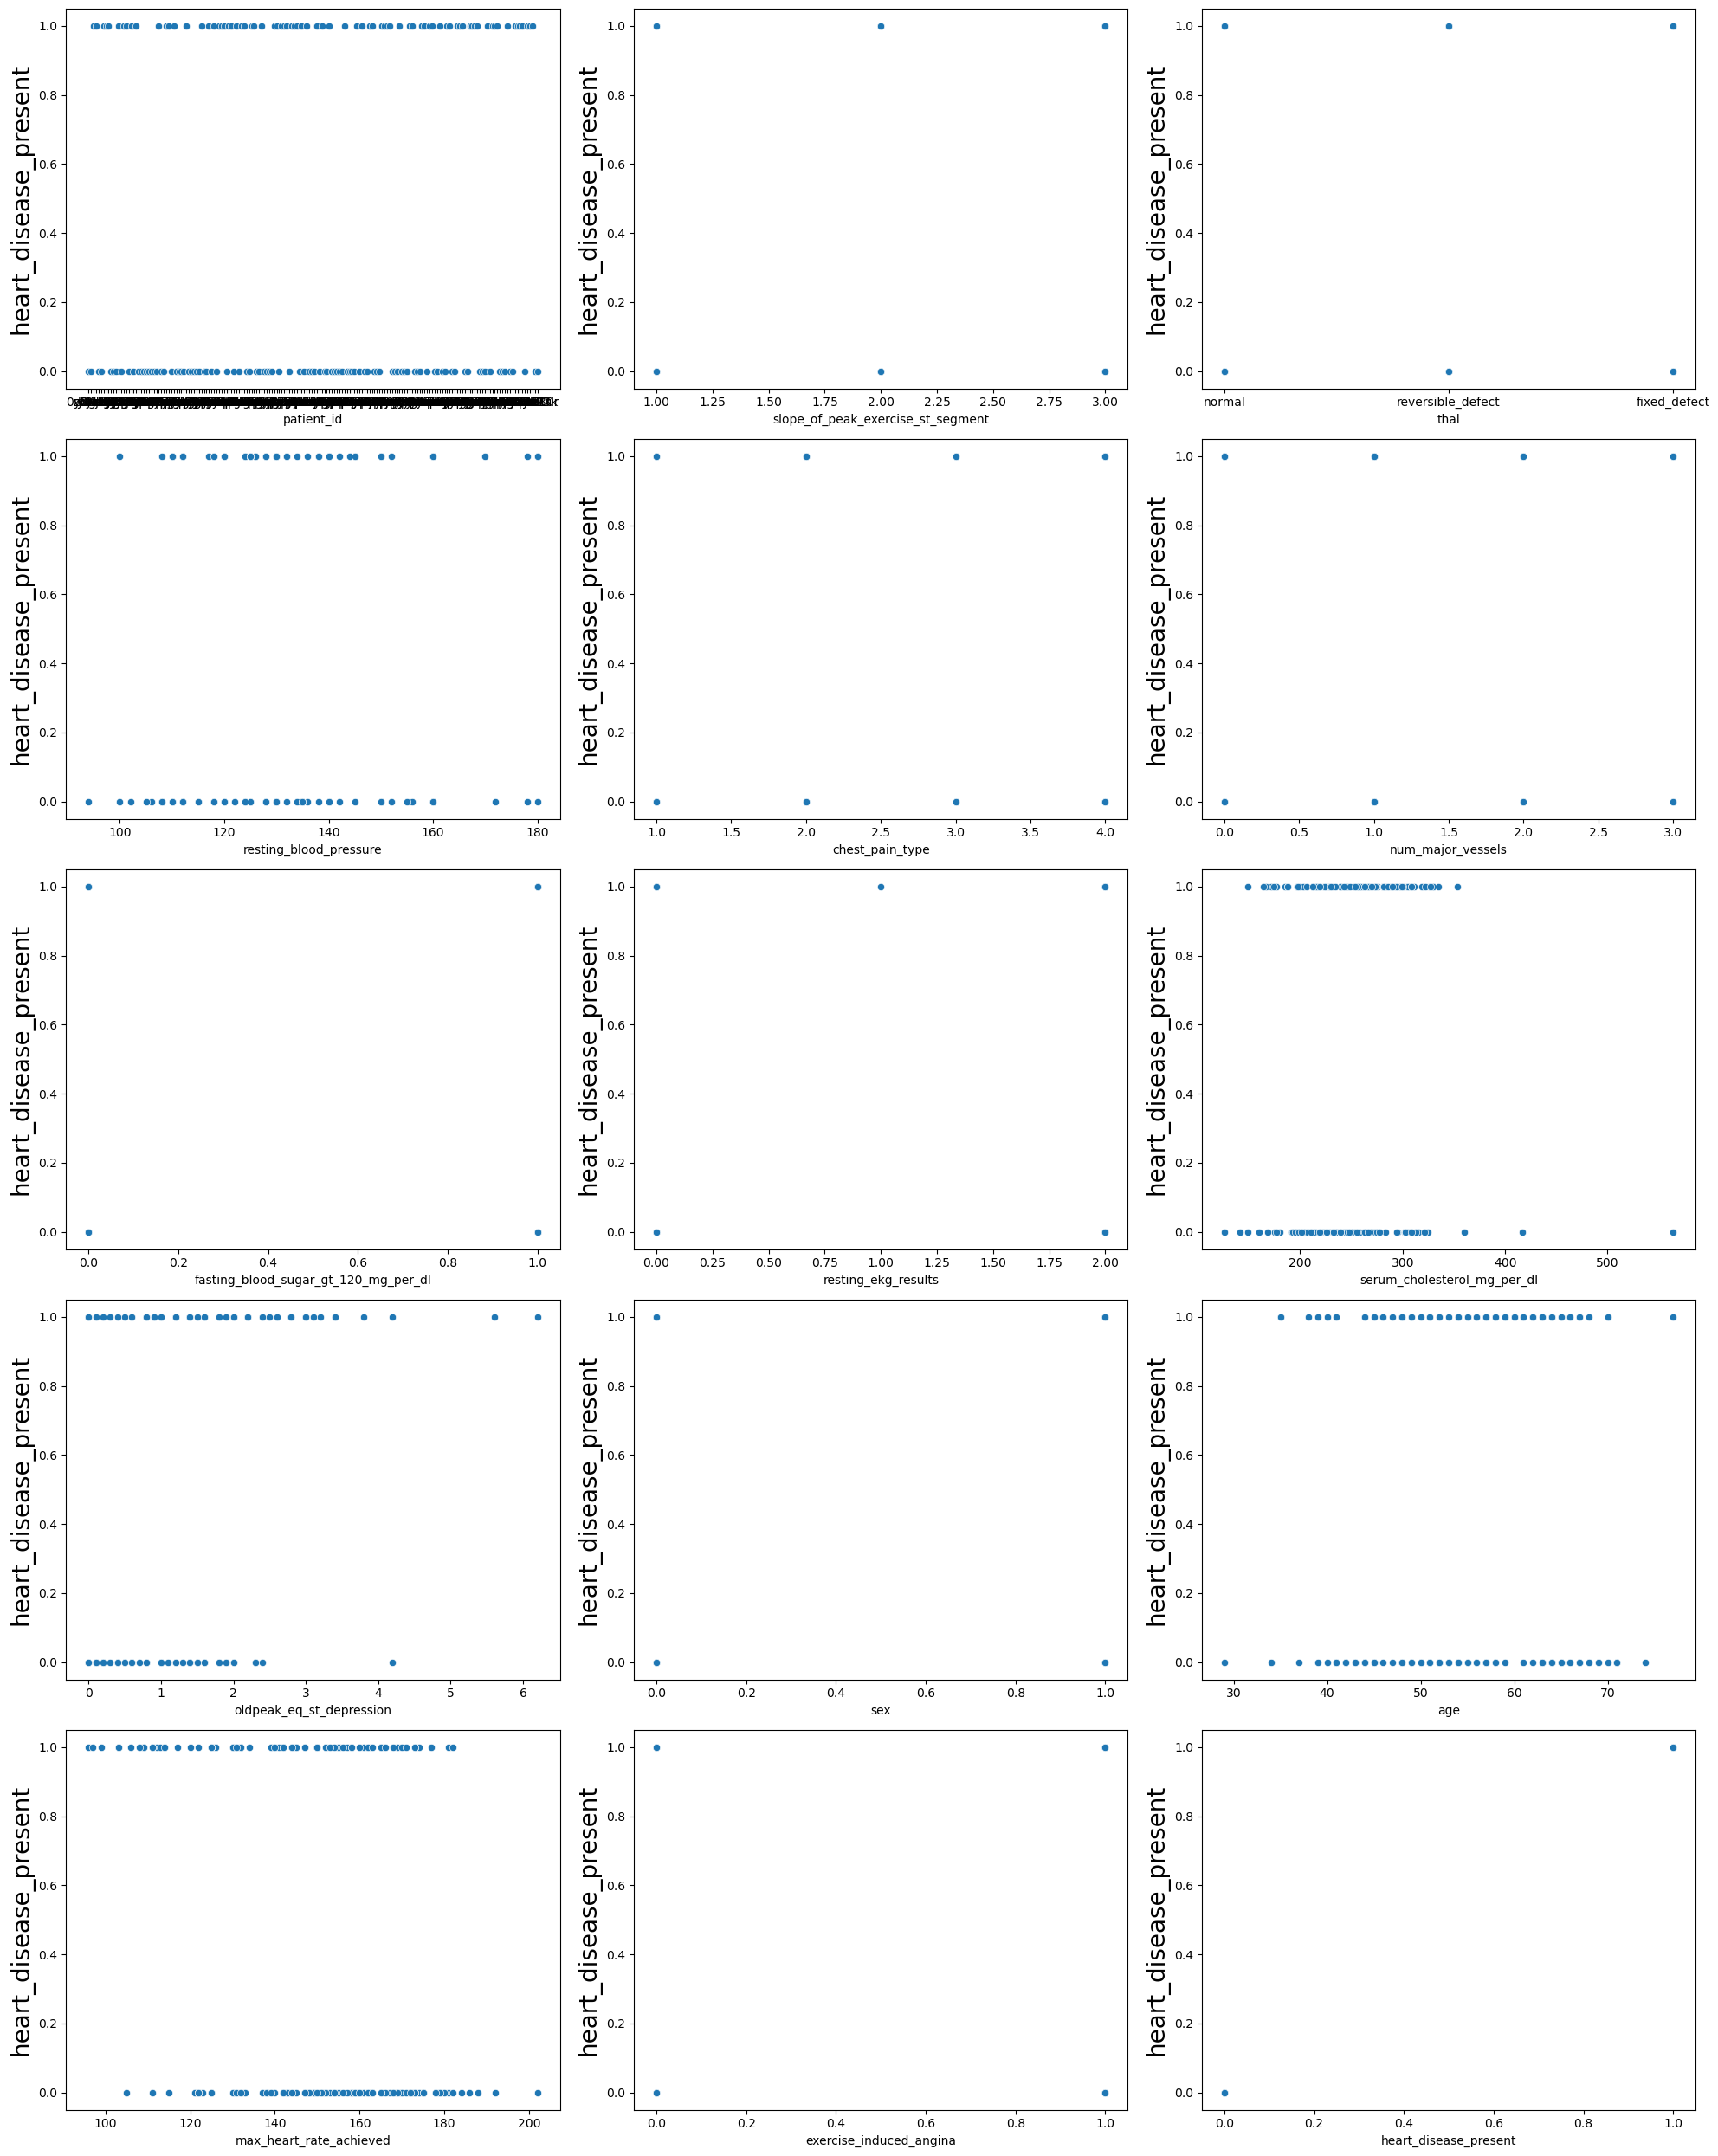

In [18]:
#Bivariant Analysis
plt.figure(figsize=(20,25),facecolor='white') 
plotnumber=1

for column in heartdataset.columns:
        plt.subplot(5,3,plotnumber)
        sns.scatterplot(x=heartdataset[column],y=heartdataset["heart_disease_present"])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('heart_disease_present',fontsize=20)
        plotnumber+=1
plt.tight_layout()

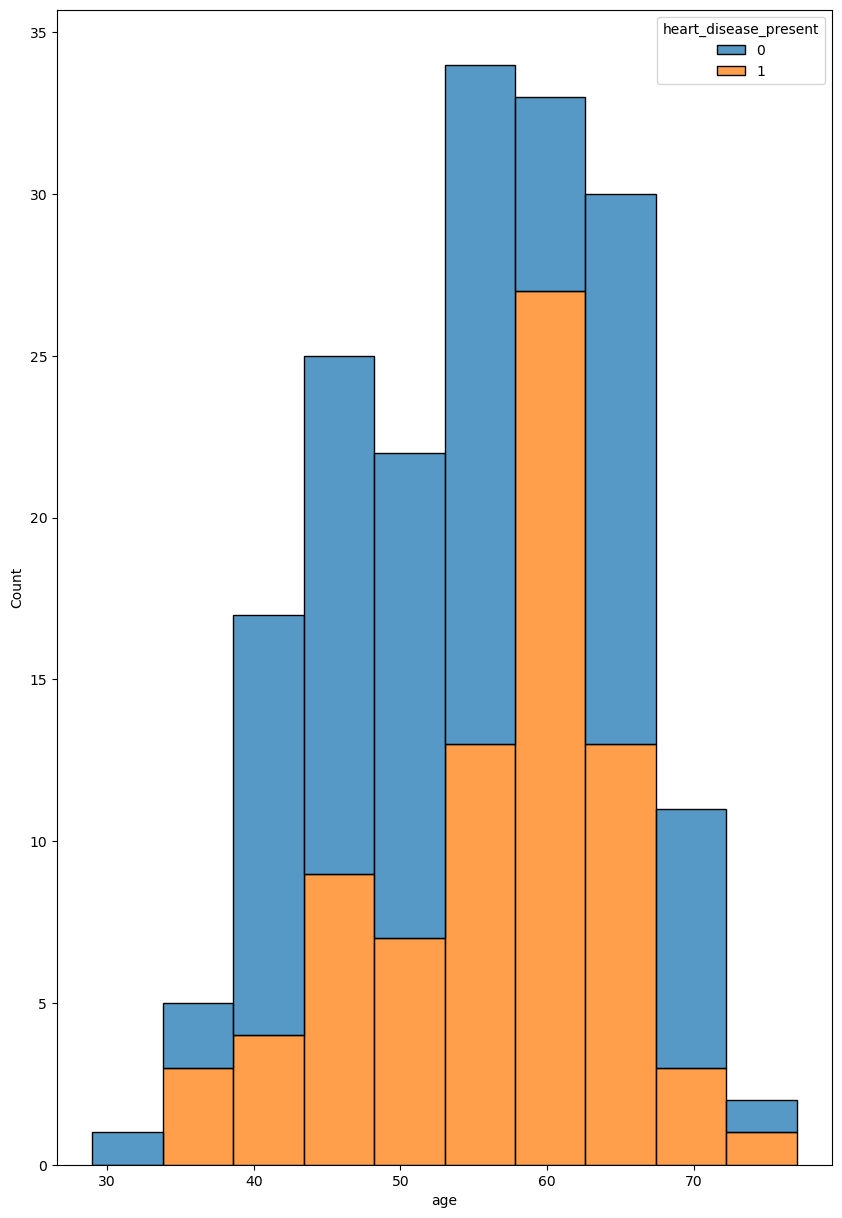

In [19]:
#Range of age having more heart disease
plt.figure(figsize=(10,15),facecolor='white') 
sns.histplot(data=heartdataset,x="age",hue="heart_disease_present",multiple="stack")
plt.show()

### Observation
1.Analysis of the bar graph reveals that individuals in the 50–60 age group exhibit the highest incidence of heart disease compared to other age brackets

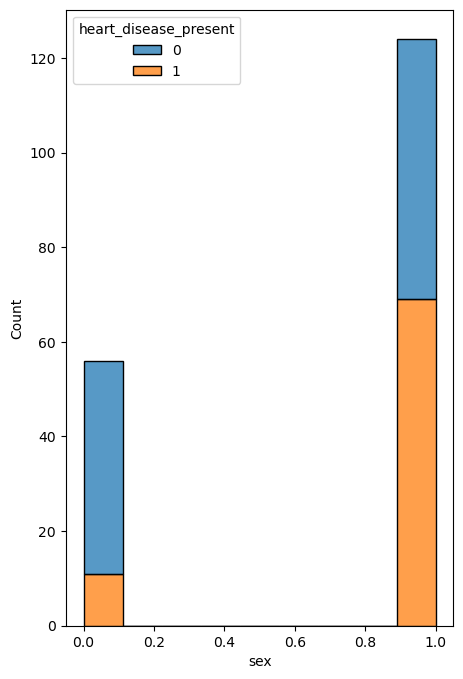

In [20]:
#which sex having more heart disease 
plt.figure(figsize=(5,8),facecolor='white')
sns.histplot(data=heartdataset,x="sex",hue="heart_disease_present",multiple="stack")
plt.show()

### Observations:

The histogram analysis reveals a noticeably higher incidence of heart disease among male patients relative to female patients

In [21]:
#As the 'Patient ID' column contains only unique identifiers and holds no predictive value, it has been excluded from the analysis. 

heartdataset=heartdataset.drop("patient_id",axis=1) 

In [22]:
# Select the numerical columns from the datasets
df_numeric = heartdataset.select_dtypes(exclude=['object']) 
df_numeric

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [23]:
#Check whether data is normally distributed
from scipy.stats import skew, kurtosis 

for columns in df_numeric.columns:
    print(columns)
    print(f"Skewness for {columns}:", skew(heartdataset[columns]))
    print(f"Kurtosis for {columns}:", kurtosis(heartdataset[columns]))


slope_of_peak_exercise_st_segment
Skewness for slope_of_peak_exercise_st_segment: 0.660585714798187
Kurtosis for slope_of_peak_exercise_st_segment: -0.5242735181877825
resting_blood_pressure
Skewness for resting_blood_pressure: 0.6515915088698496
Kurtosis for resting_blood_pressure: 0.4269155263246307
chest_pain_type
Skewness for chest_pain_type: -0.8421645409638178
Kurtosis for chest_pain_type: -0.30334358168598907
num_major_vessels
Skewness for num_major_vessels: 1.1582430715853718
Kurtosis for num_major_vessels: 0.10105467293001613
fasting_blood_sugar_gt_120_mg_per_dl
Skewness for fasting_blood_sugar_gt_120_mg_per_dl: 1.8436240212843253
Kurtosis for fasting_blood_sugar_gt_120_mg_per_dl: 1.3989495318565872
resting_ekg_results
Skewness for resting_ekg_results: -0.10012405930078504
Kurtosis for resting_ekg_results: -1.9843604643366501
serum_cholesterol_mg_per_dl
Skewness for serum_cholesterol_mg_per_dl: 1.2632907841049
Kurtosis for serum_cholesterol_mg_per_dl: 6.155855832741439
oldpeak

In [24]:
#Skewness should be in the range of [-0.5,0.5].Among all features three features need to be handled for skewness

columnstoSkewtransform = ["serum_cholesterol_mg_per_dl","resting_blood_pressure"] 

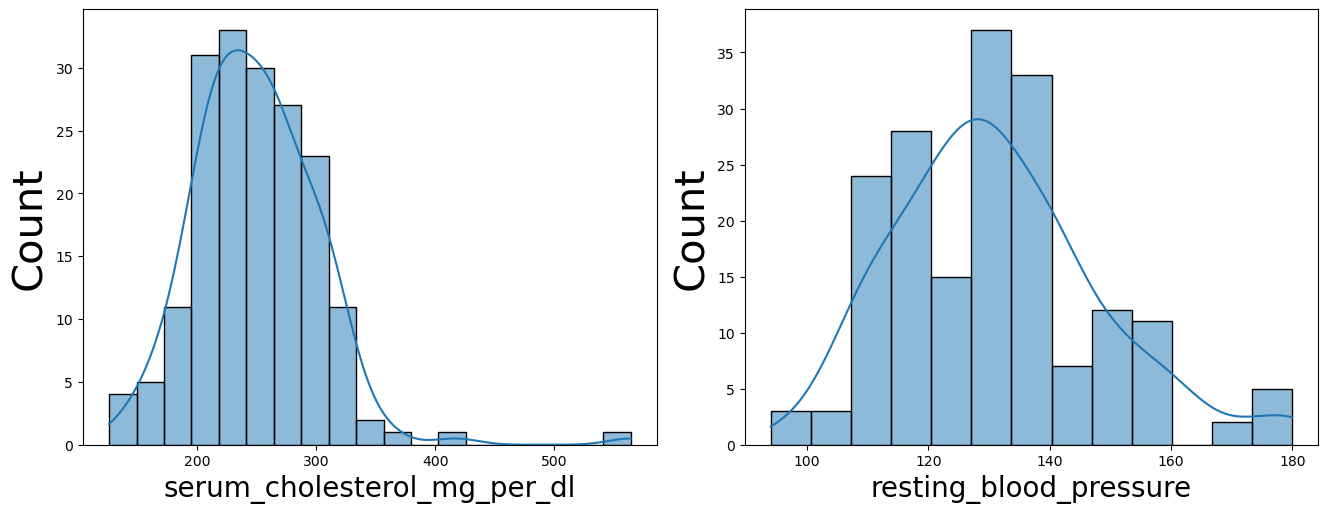

In [25]:
#Before handling skewness

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1 
for column in columnstoSkewtransform:
    if plotnumber<=3:
            plt.subplot(5,3,plotnumber)
            sns.histplot(heartdataset[column],kde=True)
            plt.xlabel(column,fontsize=20)
            plt.ylabel('Count',fontsize=30)
            plotnumber+=1
plt.tight_layout()


In [26]:
#Logarithmic transformation to handle skewness 
for col in columnstoSkewtransform: 
    heartdataset[col]=np.log(heartdataset[col]) 

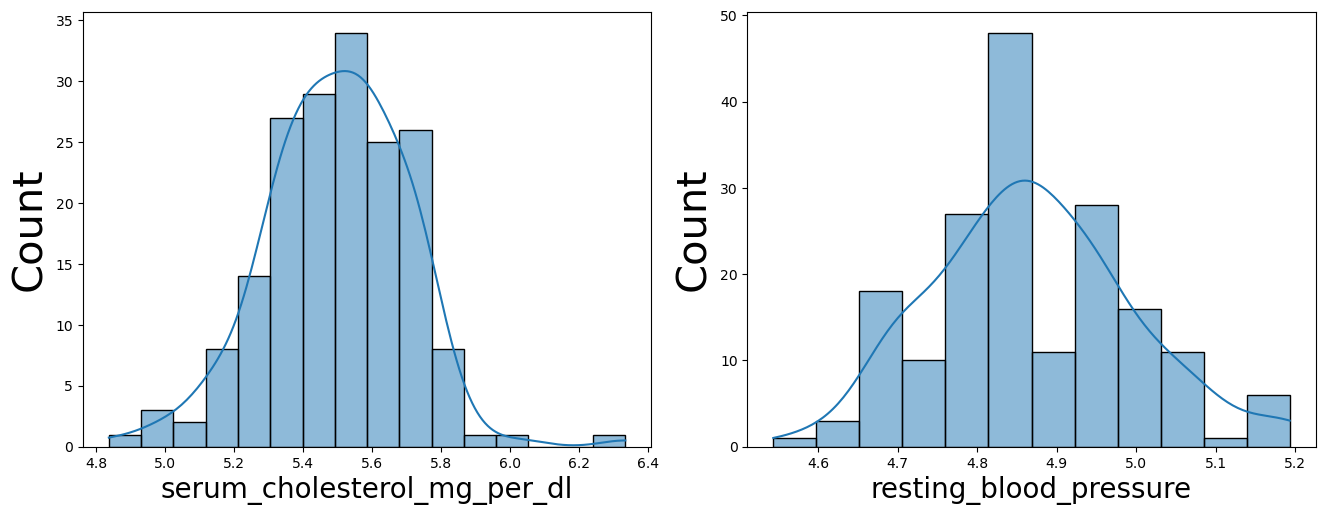

In [27]:
# After handling skewness (handled using logarithmic values)

plt.figure(figsize=(20,25),facecolor='white') 
plotnumber=1 
for column in columnstoSkewtransform: 
    if plotnumber<=3: 
            plt.subplot(5,3,plotnumber) 
            sns.histplot(heartdataset[column],kde=True) 
            plt.xlabel(column,fontsize=20) 
            plt.ylabel('Count',fontsize=30) 
            plotnumber+=1 
plt.tight_layout() 

In [28]:
#Modified skewness values 

for columns in columnstoSkewtransform: 
    print(columns) 
    print(f"Skewness for {columns}:", skew(heartdataset[columns])) 
    print(f"Kurtosis for {columns}:", kurtosis(heartdataset[columns])) 

serum_cholesterol_mg_per_dl
Skewness for serum_cholesterol_mg_per_dl: -0.019871008594573962
Kurtosis for serum_cholesterol_mg_per_dl: 1.2931320500845
resting_blood_pressure
Skewness for resting_blood_pressure: 0.2851615846041132
Kurtosis for resting_blood_pressure: -0.012226108484893139


In [29]:
#Squareroot transformation to handle skewness
heartdataset["oldpeak_eq_st_depression"]=np.sqrt(heartdataset["oldpeak_eq_st_depression"]) 

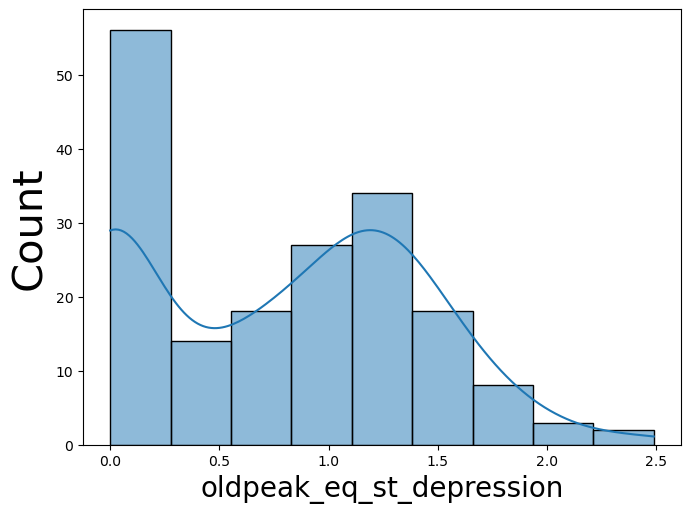

In [30]:
#After skewness handling (handled using squaretoor transformation)

plt.figure(figsize=(20,25),facecolor='white') 

plt.subplot(5,3,plotnumber)
sns.histplot(heartdataset["oldpeak_eq_st_depression"],kde=True)
plt.xlabel("oldpeak_eq_st_depression",fontsize=20)
plt.ylabel('Count',fontsize=30) 
plt.tight_layout()

In [31]:
print(f"Skewness for {columns}:", skew(heartdataset["oldpeak_eq_st_depression"]))
print(f"Kurtosis for {columns}:", kurtosis(heartdataset["oldpeak_eq_st_depression"]))

Skewness for resting_blood_pressure: 0.14135733098338193
Kurtosis for resting_blood_pressure: -1.0327004031254725


In [32]:
#Dataset after handling skewness

heartdataset

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,4.852030,2,0,0,2,5.730100,0.000000,1,45,170,0,0
1,2,normal,4.700480,3,0,0,0,5.365976,1.264911,0,54,158,0,0
2,1,normal,4.828314,4,3,0,2,5.717028,0.000000,1,77,162,1,1
3,1,reversible_defect,5.023881,4,0,0,0,5.407172,0.000000,1,40,181,0,1
4,3,reversible_defect,5.181784,1,0,0,2,5.598422,2.049390,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,4.828314,4,2,1,0,5.537334,0.447214,1,67,163,0,1
176,2,normal,5.192957,4,0,0,1,5.789960,1.843909,0,55,117,1,1
177,2,reversible_defect,4.828314,3,0,0,0,5.733341,1.341641,1,64,131,1,1
178,1,normal,4.820282,3,2,1,0,5.541264,0.000000,1,48,175,0,0


In [33]:
#Number of unique values in 'thal'column - encode this column
heartdataset["thal"].unique() 

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [34]:
#Using one-hot-encoding, convert categorical values to numerical. 
from sklearn.preprocessing import OneHotEncoder
le=OneHotEncoder()
encoded=le.fit_transform(heartdataset[['thal']]).toarray()

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded, columns=le.get_feature_names_out(['thal']))

heartdataset=pd.concat([heartdataset.drop('thal',axis=1),encoded_df],axis=1)
heartdataset

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,1,4.852030,2,0,0,2,5.730100,0.000000,1,45,170,0,0,0.0,1.0,0.0
1,2,4.700480,3,0,0,0,5.365976,1.264911,0,54,158,0,0,0.0,1.0,0.0
2,1,4.828314,4,3,0,2,5.717028,0.000000,1,77,162,1,1,0.0,1.0,0.0
3,1,5.023881,4,0,0,0,5.407172,0.000000,1,40,181,0,1,0.0,0.0,1.0
4,3,5.181784,1,0,0,2,5.598422,2.049390,1,59,145,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,4.828314,4,2,1,0,5.537334,0.447214,1,67,163,0,1,0.0,0.0,1.0
176,2,5.192957,4,0,0,1,5.789960,1.843909,0,55,117,1,1,0.0,1.0,0.0
177,2,4.828314,3,0,0,0,5.733341,1.341641,1,64,131,1,1,0.0,0.0,1.0
178,1,4.820282,3,2,1,0,5.541264,0.000000,1,48,175,0,0,0.0,1.0,0.0


<Axes: >

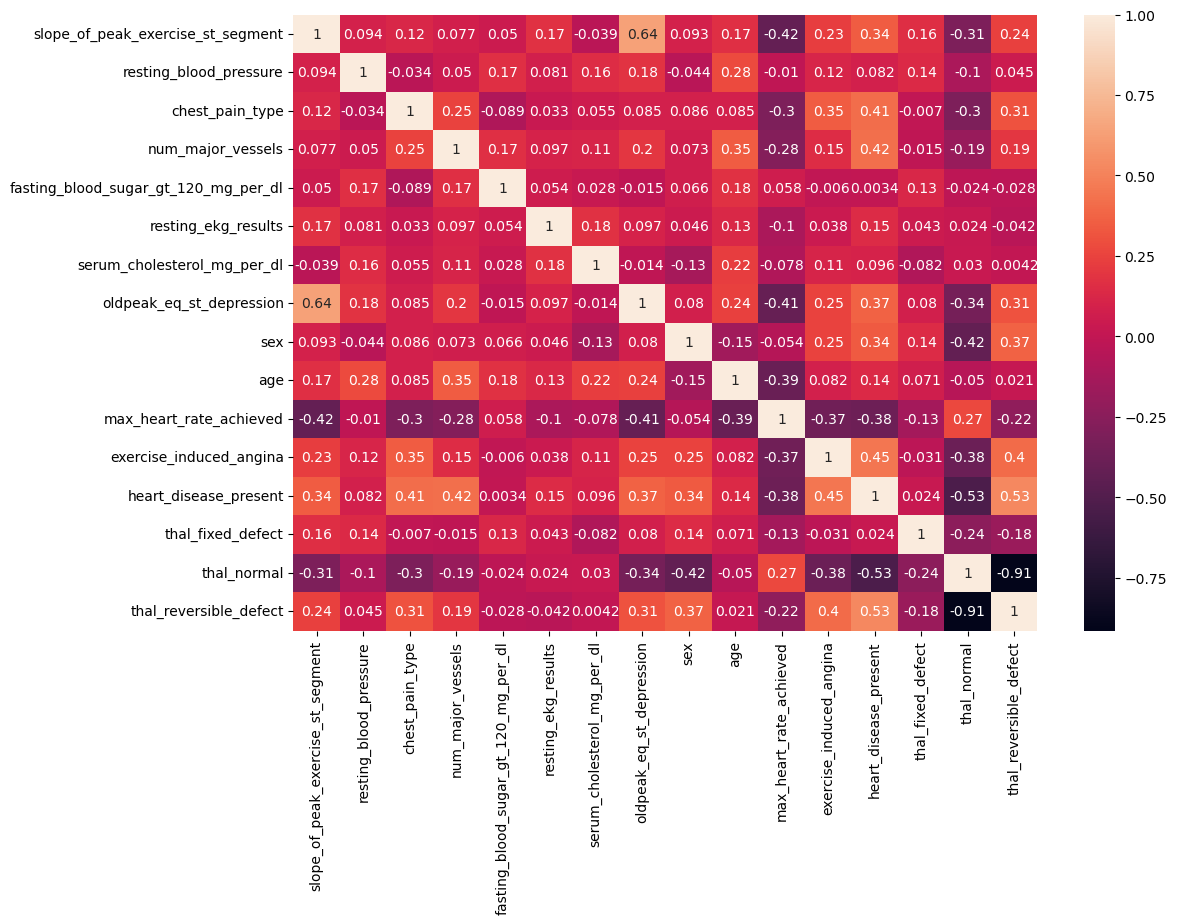

In [35]:
#check the correlation in heartdataset
plt.figure(figsize=(12, 8)) 
sns.heatmap(heartdataset.corr(),annot=True) 

In [36]:
result=heartdataset.corr() 
result

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
slope_of_peak_exercise_st_segment,1.000000,0.093839,0.121207,0.076832,0.050199,0.172191,-0.038716,0.635759,0.093340,0.169918,-0.418102,0.225459,0.344224,0.157263,-0.305492,0.243341
resting_blood_pressure,0.093839,1.000000,-0.033781,0.049510,0.167782,0.080649,0.155379,0.181136,-0.044136,0.276004,-0.009959,0.115729,0.082308,0.135227,-0.100559,0.045145
chest_pain_type,0.121207,-0.033781,1.000000,0.249061,-0.088992,0.033379,0.055229,0.085467,0.086057,0.085001,-0.301792,0.346266,0.412829,-0.007042,-0.300914,0.307524
num_major_vessels,0.076832,0.049510,0.249061,1.000000,0.169792,0.096656,0.106432,0.197310,0.073107,0.347355,-0.275687,0.153407,0.421519,-0.015493,-0.185283,0.194026
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.167782,-0.088992,0.169792,1.000000,0.053864,0.028266,-0.015414,0.066010,0.176101,0.058369,-0.005956,0.003379,0.125474,-0.023938,-0.028324
resting_ekg_results,0.172191,0.080649,0.033379,0.096656,0.053864,1.000000,0.176794,0.097360,0.045786,0.126856,-0.102766,0.037773,0.145933,0.043308,0.023521,-0.041946
serum_cholesterol_mg_per_dl,-0.038716,0.155379,0.055229,0.106432,0.028266,0.176794,1.000000,-0.013869,-0.127767,0.224590,-0.078492,0.105544,0.096175,-0.081505,0.029586,0.004191
oldpeak_eq_st_depression,0.635759,0.181136,0.085467,0.197310,-0.015414,0.097360,-0.013869,1.000000,0.079919,0.241912,-0.406973,0.249323,0.367310,0.079946,-0.340688,0.311348
sex,0.093340,-0.044136,0.086057,0.073107,0.066010,0.045786,-0.127767,0.079919,1.000000,-0.148997,-0.053960,0.251096,0.335421,0.144932,-0.421950,0.366381
age,0.169918,0.276004,0.085001,0.347355,0.176101,0.126856,0.224590,0.241912,-0.148997,1.000000,-0.394630,0.081811,0.138255,0.070984,-0.049719,0.020593


In [37]:
result>0.8

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
slope_of_peak_exercise_st_segment,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
resting_blood_pressure,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
chest_pain_type,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
num_major_vessels,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
fasting_blood_sugar_gt_120_mg_per_dl,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
resting_ekg_results,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
serum_cholesterol_mg_per_dl,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
oldpeak_eq_st_depression,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sex,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [38]:
### Observation:
1.  As per the results above, all columns exhibit either moderate or low correlation; no features show a high degree of correlation.

SyntaxError: invalid syntax (2979342490.py, line 2)

In [ ]:
#Select the target column in mycolumnfinal

Mycolumnfinal=heartdataset["heart_disease_present"]

In [ ]:
#Drop the target column from the original dataset

heartdataset=heartdataset.drop("heart_disease_present",axis=1)

In [ ]:
#Scaling - Scale our model to get more precise results
#Use Min-Max scale to convert to Z-scale values
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 
x=scaler.fit_transform(heartdataset) 

In [ ]:
heartdata=pd.DataFrame(x,columns=heartdataset.columns) 

In [ ]:
# Assign the X and Y values
x=heartdata
y=Mycolumnfinal
x

In [ ]:
y

In [ ]:
#Split the data to train and Test data
# Note: 75% of total dataset is taken as the train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

## Observations:
1.  Since it is categorical result, lets build Logistic Regression model

In [ ]:
#Model build - Logistic regresssion model
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
LogReg=LogisticRegression()


In [ ]:
#Model build - SVC(Support vector classification) model 

#Note: To increase the efficiency we use hyperparameter tuning for better results

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid to search
param_grid = {
     'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}
# Create GridSearchCV object
SVCmodel = GridSearchCV(
    estimator=SVC(),  # Your current model
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all CPU cores
)

In [ ]:
#Model Build - Decision tree classifier model

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

In [ ]:
#Model build - Random forest classifier model

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
#Model build - XGB classifier model

from xgboost import XGBClassifier
xgmodel = XGBClassifier()

In [ ]:
pip install catboost

In [ ]:
#Model build -  Cadboost Classifier model

from catboost import CatBoostClassifier
CBmodel = CatBoostClassifier()

In [ ]:
#Model build - Naive bayes model

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [ ]:
#Model build - Adaboost classifier

from sklearn.ensemble import AdaBoostClassifier
adamodel = AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
#Model build - Gradient boost classifier

from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train
gbmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
#Model build - Neural networks 

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

# Use a pipeline to standardize data for NN
nn_pipeline = Pipeline([
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])

In [ ]:
# A for loop is utilized to systematically train and evaluate multiple classification models, 
# allowing for an efficient comparison of their performance on the training and test datasets

models= {
    "Logistic Regression":LogReg,
    "Decision Tree":dt_model,
    "RandomForest":rf_model,
    "SVM":SVCmodel,
    "XGBoost":xgmodel,
    "CatBoost":CBmodel,
    "Naive Bayes":nb_model,
    "AdaBoost":adamodel,
    "Gradient Boost":gbmodel,
    "Neural Network":nn_pipeline
}
accuracy_result={}
predictedvalues={}
for name,model in models.items():
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    print(model)
    accuracy=accuracy_score(Y_test,y_pred)
    result[name]=accuracy
    predictedvalues[name]=y_pred


In [ ]:
#Accuracy result for each model

print(accuracy_result)

In [ ]:
# Confusion matrix for the models 
selected_models = list(models.keys()) # or change to specific ones

fig, axes = plt.subplots(4, 3, figsize=(18, 15))
fig.suptitle("Confusion Matrices for Heart Disease Prediction Models", fontsize=18)
axes = axes.flatten()

for idx, model_name in enumerate(selected_models):
    y_pred = predictedvalues[model_name]
    cm = confusion_matrix(Y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], colorbar=False)
    axes[idx].set_title(model_name,fontsize=16)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
##ROC curve results for different models 

for idx, model_name in enumerate(selected_models):
    # Some models use predict_proba, others like SVM use decision_function
    y_pred = predictedvalues[model_name]

    fpr, tpr, _ = roc_curve(Y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Plot settings
plt.xlim([0.0, 0.8])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Lets analyse accuracy Using bargraph 
plt.figure(figsize=(12, 6))
bars = plt.bar(result.keys(), result.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.95)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Heart Disease Prediction') 

## Observations:
#### Model Performance:
The graph clearly shows that the Neural Network model outperforms all others, achieving the highest accuracy of 88% on the heart disease prediction dataset.

#### Secondary Performers:
Logistic Regression and XGBoost follow closely, each delivering a commendable accuracy of 84%, making them strong alternatives.

#### ROC Curve Analysis:
The ROC curve further reinforces that the Neural Network model exhibits superior discriminatory power, effectively distinguishing between positive and negative cases, solidifying its position as the top-performing model.

#### Impact of Boosting Techniques:
The results suggest that boosting algorithms enhance predictive accuracy, indicating that ensemble methods like XGBoost contribute to improved model performance.

#### from EDA:
Exploratory Data Analysis reveals that heart disease prevalence is highest among individuals aged 50 to 60, and it is more commonly observed in males compared to females.

## Learnings
#### Imbalanced Class Distribution:
While the dataset was not heavily skewed, the slight imbalance between positive and negative cases impacted the performance of certain models—particularly their ability to correctly classify the minority class. 

#### Model Sensitivity to Feature Scaling:
Models such as Logistic Regression and Neural Networks were notably sensitive to the scale of input features. Preprocessing steps like normalization and standardization proved essential for maintaining consistency. However, when using StandardScaler, a slight drop in accuracy was observed. Additionally, label encoding introduced fluctuations in performance, indicating the need for more robust encoding techniques like one-hot encoding or ordinal encoding based on feature context.

#### Hyperparameter Tuning Challenges:
Optimizing complex models like XGBoost and Neural Networks required intensive hyperparameter tuning, which was both computationally demanding and time-consuming. Grid search and random search methods helped improve model accuracy, but also underscored the importance of balancing computational cost with performance gains.